In [26]:
#|default_exp app

## About this notebook

We will use this notebook to create a gradio app that will use a computer vision model. Testing here let's us interact with the code, which we will then be able to export to a *script* from this *notebook*.

Some things to keep in mind:
 - The model this app will use will be a `.pkl` file. `.pkl` files require that whatever functions you used in the training of your app to be included in this notebook. Use the cell below to add in any functions from your training notebook. If you used the `00-computer-vision-trainer.ipynb` trainer, you should be fine to simply import your `.pkl` model file.

Our first step is to import fastai vision and gradio.

In [114]:
#|export
from fastai.vision.all import *
import gradio as gr
path_to_pkl_model = '/workspace/models/model_epoch10.pkl'

Load the learner from our model and data.

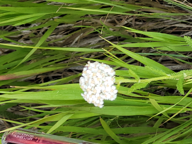

In [115]:
im = PILImage.create('/workspace/images/TEST_IMAGES/yarrow.jpg')
im.thumbnail((192,192))
im

In [130]:
#|export
learn = load_learner(path_to_pkl_model)

Now grab the labels from the model that was trained.

In [131]:
learn.predict(im)

('Yarrow',
 tensor(29),
 tensor([4.5171e-05, 2.5516e-06, 4.1884e-06, 1.0127e-06, 6.2268e-05, 3.4754e-07,
         4.9282e-06, 5.7371e-08, 3.4868e-04, 3.9285e-04, 9.6110e-06, 1.3154e-03,
         7.9850e-06, 1.1602e-05, 2.5441e-06, 8.3266e-08, 4.4352e-06, 3.2058e-05,
         2.6267e-03, 2.3405e-05, 1.0193e-06, 5.5606e-06, 7.2864e-04, 4.2342e-04,
         1.3370e-04, 1.5823e-05, 2.7362e-05, 4.7458e-05, 2.6237e-04, 9.9300e-01,
         4.0148e-05, 4.2044e-04]))

In [139]:
#|export
categories = learn.dls.vocab # learn.dls.vocab provides the categories from our trained model

def classify_image(img):
    img = PILImage.create(img).resize((192, 192))
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [141]:
classify_image(im)

{'Black_Hills_Spruce': 2.5861932954285294e-05,
 'Box_Elder_Maple_Tree': 2.063418605757761e-06,
 'Box_Elder_Mushroom': 4.007426014140947e-06,
 'Burdock': 1.141534653470444e-06,
 'Burr_Oak_Tree': 2.712921741476748e-05,
 'Chokecherry': 3.314106606921996e-07,
 'Control_Or_Trail': 3.7689819691877346e-06,
 'Cow_Parsnip': 6.379167416525888e-08,
 'Dog_Bane': 0.0004219707625452429,
 'Flax': 0.0004784284974448383,
 'Goatsbeard': 9.16538465389749e-06,
 'Harebell': 0.001268093241378665,
 'Juneberry': 7.851315785956103e-06,
 'Juniper': 1.044890632329043e-05,
 'Pine_Tree': 2.6101972707692767e-06,
 'Plantain': 1.0471650568888435e-07,
 'Poison_Hemlock': 4.413077022036305e-06,
 'Poison_Ivy': 1.3353767826629337e-05,
 'Prairie_Turnip': 0.0028381061274558306,
 'Prairie_Turnip_Root': 3.202308653271757e-05,
 'Raspberry_Shrub': 1.059992314367264e-06,
 'Red_Willow': 3.6183089378027944e-06,
 'Scarlet_Guara': 0.0010051721474155784,
 'Sego_Lily': 0.0003210395516362041,
 'Silver_Leaf_Scurfpea': 0.0002188598009524

The ports for local testing complicate things, so test it through uploading to gradio.

In [147]:
#|export
image = gr.Image()
label = gr.Label()

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7894

To create a public link, set `share=True` in `launch()`.


In [148]:
from nbdev.export import nb_export

# export the this notebook to a script in cells where #|export is the first line
nb_export('app.ipynb','./scripts/')